<a href="https://colab.research.google.com/github/nicolo969/VaR-/blob/main/VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 9.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn 
from scipy.stats import norm
import yfinance as yf 
from tabulate import tabulate

In [ ]:

df = yf.download('^GSPC')
df['retornos'] = df.Close.loc[:'2020-01-01'].pct_change()
df['retornos_2020'] = df.Close.loc['2020-01-01':].pct_change()
df['retornos'].dropna(inplace=True)
df['retornos_2020'].dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_2020
Date,,,,,,,,
1950-01-03,16.66000,16.660000,16.660000,16.660000,16.660000,1260000,NaN,NaN
1950-01-04,16.85000,16.850000,16.850000,16.850000,16.850000,1890000,0.011405,NaN
1950-01-05,16.93000,16.930000,16.930000,16.930000,16.930000,2550000,0.004748,NaN
1950-01-06,16.98000,16.980000,16.980000,16.980000,16.980000,2010000,0.002953,NaN
1950-01-09,17.08000,17.080000,17.080000,17.080000,17.080000,2520000,0.005889,NaN
...,...,...,...,...,...,...,...,...
2022-05-16,4013.02002,4046.459961,3983.989990,4008.010010,4008.010010,3824320000,NaN,-0.003946
2022-05-17,4052.00000,4090.719971,4033.929932,4088.850098,4088.850098,3846580000,NaN,0.020170
2022-05-18,4051.97998,4051.979980,3911.909912,3923.679932,3923.679932,4428960000,NaN,-0.040395


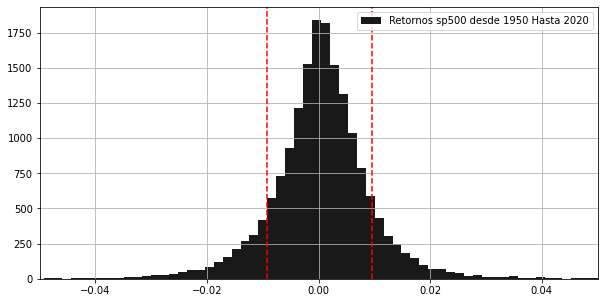

In [ ]:
media1 = df['retornos'].mean()
std1 = df['retornos'].std()
media2 = df['retornos_2020'].mean()
std2 = df['retornos_2020'].std()
fig,ax = plt.subplots(figsize=(10,5))
df['retornos'].hist(bins=200,histtype='stepfilled',alpha=0.9,color = 'black')
ax.set_xlim(-0.05,0.05)
label=(['Retornos sp500 desde 1950 Hasta 2020'])

plt.legend(label)

plt.axvline(std1,ls='--',color='r')
plt.axvline(media1-std1,ls='--',color='r')



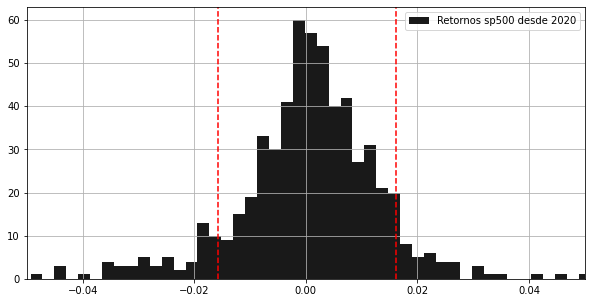

In [ ]:
media1 = df['retornos'].mean()
std1 = df['retornos'].std()
media2 = df['retornos_2020'].mean()
std2 = df['retornos_2020'].std()
fig,ax = plt.subplots(figsize=(10,5))
df['retornos_2020'].hist(bins=100,histtype='stepfilled',alpha=0.9,color = 'black')
ax.set_xlim(-0.05,0.05)

label=(['Retornos sp500 desde 2020'])

plt.legend(label)
plt.axvline(std2,ls='--',color='r')
plt.axvline(media2-std2,ls='--',color='r')


In [ ]:
VaR1_90 = norm.ppf((1-0.9),media1,std1)
VaR1_95 = norm.ppf((1-0.95),media1,std1)
VaR1_99 = norm.ppf((1-0.99),media1,std1)
#desde 2020
VaR2_90 = norm.ppf((1-0.9),media2,std2)
VaR2_95 = norm.ppf((1-0.95),media2,std2)
VaR2_99 = norm.ppf((1-0.99),media2,std2)

print(tabulate([['90%',VaR1_90],['95%',VaR1_95],['99%',VaR1_99]],headers = ['Nivel de Confianza','VaR Historico 1950-2020']))
print(tabulate([['90%',VaR2_90],['95%',VaR2_95],['99%',VaR2_99]],headers = ['Nivel de Confianza','VaR Historico 2020']))

Nivel de Confianza      VaR Historico 1950-2020
--------------------  -------------------------
90%                                  -0.0119606
95%                                  -0.0154492
99%                                  -0.0219932
Nivel de Confianza      VaR Historico 2020
--------------------  --------------------
90%                             -0.0203783
95%                             -0.0262779
99%                             -0.0373446


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


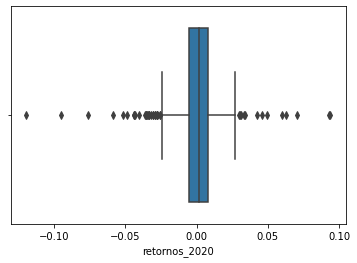

In [ ]:
import seaborn as sns
sns.boxplot(df['retornos_2020'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


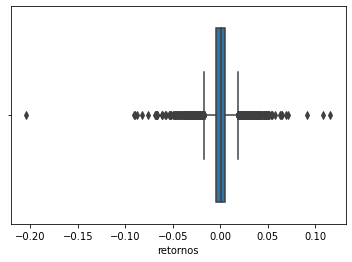

In [ ]:
sns.boxplot(df['retornos'])
